# HNCDI Explain: Grover Tutorial 3

This is tutorial 3 on Grover's Algorithm. This is a 5-qubit example, with varying Grover iterations. The notebook performs two Grover circuits: the first circuit with 1-iteration and the second with $k'$-iterations.

The code below will do the following. We will first select the maximum number of grover iterations determined by the parameter $k$, where $k-1 = k'$. We will then select a number from a list and then create the corresponding bit-string for the good item. We will import Qiskits existing algorithm that implements Grovers algorithm. We will then run Grover's algorithm for 1-iteration and $k'$-iterations and compare the probability that the marked item was found.

__Task__. In cell 2 below, modify the parameter $k$. How does this change the probability that the marked item is found?


In [3]:
# Default imports # Importing standard Qiskit libraries
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.compiler import transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import execute
from qiskit.providers.ibmq import least_busy

import random
from qiskit.quantum_info import Statevector


Define the parameter $k$ that determines the maximum number of Grover iterations.

__Task.__ In the cell below, modify the integer parameter $k$. For example, start with $k$ is $4$ and subsequently increase.

In [4]:
### Modify Parameter k here ###

k = 4

###

print({'The maximum number of Grover iterations is': k-1})

{'The maximum number of Grover iterations is': 3}


We will now step through Grover's algorithm, where we will be able to choose the marked item. First, we create a list of numbers from $0$ to $2^n - 1$, where $n$ is the number of qubits. 

In [5]:
# number of qubits is 5
n = 5
myList = list(range(0, (2**n)))
print(myList)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


From this list, choose a number that will correspond to the good marked item. We will convert this to a bit-string. 

Note that this cell also allows you to randomly generate the good marked item. As default, it is set to $31$, the last item on the list.

In [6]:
# Here we can enter the good item or randomly generate it
secret = 31
#secret = random.randint(0, 2**n -1)  

secret_string = format(secret, "04b")  # format the owner in bit string

print({'The secret number is ': secret})
print({'And the corresponding secret string is ': secret_string})

{'The secret number is ': 31}
{'And the corresponding secret string is ': '11111'}


We will now create the state vector corresponding to the selected bit-string.

In [7]:
# Create state vector corresponding to the selected string 
oracle = Statevector.from_label(secret_string)  
print('This is the corresponding state for the marked item:')
oracle.draw(output='latex')

This is the corresponding state for the marked item:


<IPython.core.display.Latex object>

We will now import and use the existing Qiskit algorithms that perform Grover's circuit.

In [8]:
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover

problem = AmplificationProblem(oracle, is_good_state=secret_string)

#define several grover circuits for different no. of iterations
grover_circuits = []

print({'Thew maximum number of Grover iterations is': (k-1)})
#Construct Grover circuits for different k
for iteration in range(1, k):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

{'Thew maximum number of Grover iterations is': 3}


We will first submit the grover circuit with 1 iteration to a simulator. 

{'This is the Grover circuit with number of iterations =': 1}


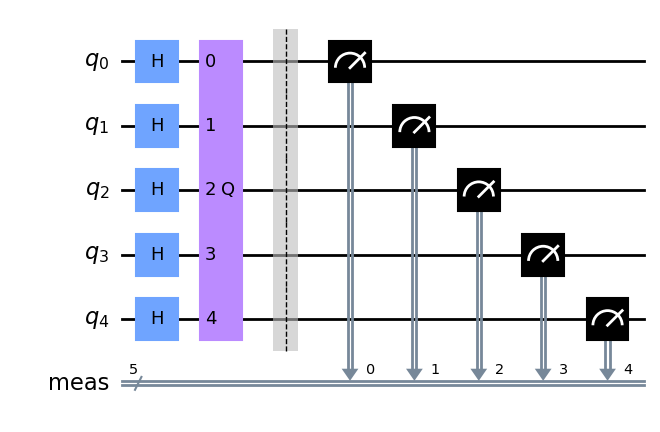

In [9]:
# Grover's circuit with 1 iteration
print({'This is the Grover circuit with number of iterations =': (1)})
qc1 = grover_circuits[0]
qc1.draw()

{'Recall the good marked item is': '11111'}


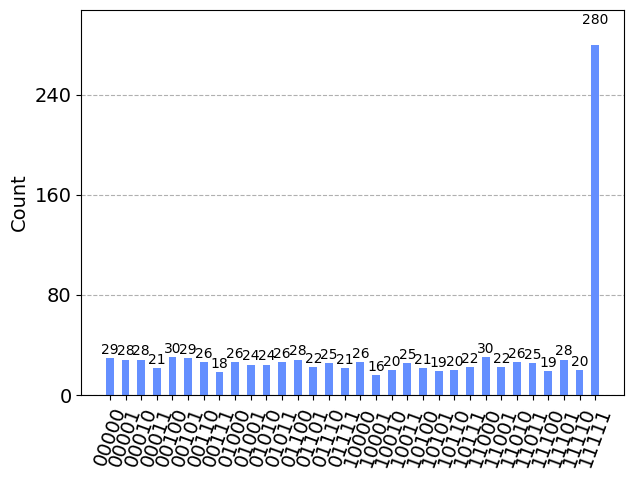

In [10]:
print({'Recall the good marked item is': secret_string})
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc1, sim)
counts = sim.run(t_qc).result().get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We will now submit the grover circuit with $k$ iterations to a simulator. 

{'This is the Grover circuit with number of iterations =': 3}


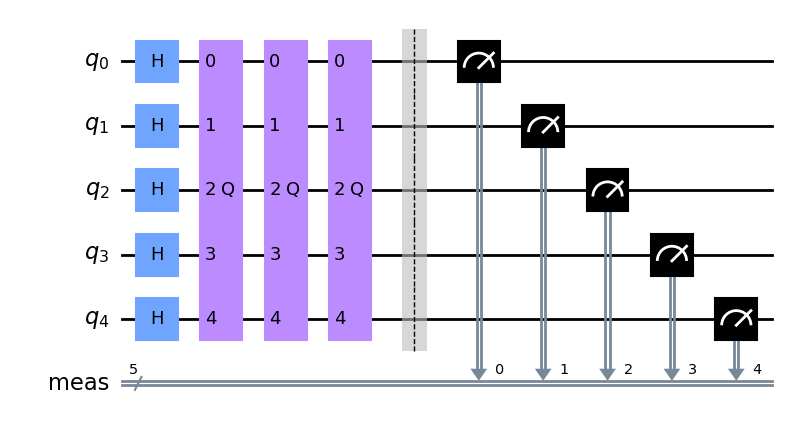

In [11]:
# Grover's circuit with max number of iterations
print({'This is the Grover circuit with number of iterations =': (k-1)})
qcm = grover_circuits[k-2]
qcm.draw()

{'Recall the good marked item is': '11111'}


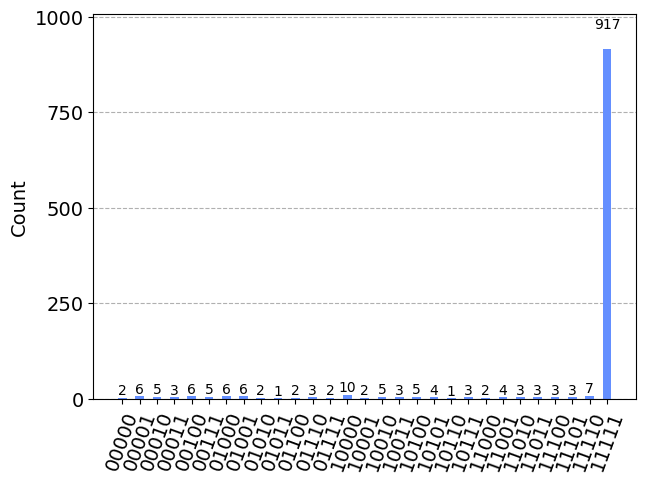

In [12]:
print({'Recall the good marked item is': secret_string})
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qcm, sim)
counts = sim.run(t_qc).result().get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Compare this now to the Grover Circuit with 1-iteration. Has the marked item been found with high probability? How does the number of Grover circuits affect the probability that the marked good item was found? 

In [14]:
#Can compare to real quantum hardware
# circ = qcm

# from qiskit import execute
# from qiskit.providers.ibmq import least_busy
# provider = IBMQ.load_account() 
# device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
# job = execute(circ, backend = device, shots =1024, optimization_level = 3)
# from qiskit.tools.monitor import job_monitor
# job_monitor(job, interval = 2)
# results = job.result()
# answer = results.get_counts(circ)
# plot_histogram(answer)